# Preprocessing

In [103]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
df1 = pd.read_csv("c:/users/fre_f/ARVOproject/BLclinicalremoved.csv", index_col = "ID", encoding="ansi")
#df1.head()

In [105]:
df1.dtypes

MeiboODinf-0       float64
MeiboOSinf-0       float64
Kjønn M=0          float64
Alder              float64
Synskorr.kir       float64
                    ...   
Skjermbruk-0       float64
Kontaktlinser-0    float64
Mascara-0          float64
Eyeliner-0         float64
AC-0               float64
Length: 92, dtype: object

In [106]:
df1["Vinter"].unique()
df1["RensVarme"].unique()

array(['0', '2', '7', '4', '5', '6', '3', '1', '8', '9', '10', ' ', nan],
      dtype=object)

In [107]:
#Remove empty strings
df1['Vinter'] = df1['Vinter'].replace(" ", np.nan)
df1['RensVarme'] = df1['RensVarme'].replace(" ", np.nan)

In [108]:
df1["Vinter"].unique()
df1["RensVarme"].unique()

array(['0', '2', '7', '4', '5', '6', '3', '1', '8', '9', '10', nan],
      dtype=object)

In [109]:
#Convert dtype
df1['RensVarme']=df1['RensVarme'].astype('float')
df1['Vinter']=df1['Vinter'].astype('float')

In [110]:
df1['MeiboODinf-0'].unique()


array([ 2.,  4.,  3.,  1., nan,  0.])

In [111]:
df1["MeiboODinf-0"].value_counts()

2.0    215
3.0    183
4.0    129
1.0     44
0.0      2
Name: MeiboODinf-0, dtype: int64

In [112]:
#Implement class 0 in class 1
df1['MeiboODinf-0'] = df1['MeiboODinf-0'].replace(0, 1)
df1['MeiboOSinf-0'] = df1['MeiboOSinf-0'].replace(0, 1)

In [113]:
df1.shape

(594, 92)

In [114]:
df1 = df1.dropna(axis=0, subset=["MeiboODinf-0"])
df1 = df1.dropna(axis=0, subset=["MeiboOSinf-0"])

In [115]:
df1.shape

(573, 92)

In [116]:
df1['MeiboODinf-0'].unique()
df1['MeiboOSinf-0'].unique()

array([2., 4., 3., 1.])

In [117]:
#df1.iloc[:,2:92]

In [118]:
#imp = SimpleImputer(strategy='mean')
#imp = IterativeImputer(random_state=42, max_iter=100)
imp = KNNImputer(n_neighbors=3, weights="uniform")
df_imputed = imp.fit_transform(df1)
df2 = pd.DataFrame(df_imputed, columns = df1.columns.tolist(), index = df1.index)
#df2

In [119]:
X = df2.iloc[:,2:]


In [120]:
y = df2.iloc[:,0]

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)


In [122]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(458, 90)
(115, 90)
(458,)
(115,)


In [123]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_trainScaled = scaler.fit_transform(X_train)
X_testScaled = scaler.transform(X_test)
X_trainScaled = pd.DataFrame(X_trainScaled, columns = X_train.columns.tolist(), index=X_train.index)
X_testScaled = pd.DataFrame(X_testScaled, columns = X_test.columns.tolist(), index=X_test.index)

In [124]:
#X_trainScaled

In [125]:
print(X_trainScaled.shape)
print(X_testScaled.shape)
print(y_train.shape)
print(y_test.shape)

(458, 90)
(115, 90)
(458,)
(115,)


In [126]:
def metrics():
    y_pred = clf.predict(X_testScaled)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="macro")
    cf = confusion_matrix(y_test, y_pred)
    target_names = ['class 0/1', 'class 2', 'class 3', 'class 4']
    print(f"Balanced accuracy: {bal_acc}")
    print(f"MCC: {mcc}")
    print(f"F1: {f1}")
    print(f"Confusion matrix: \n{cf}")
    print(f"Classification report: \n{classification_report(y_test, y_pred, target_names=target_names)}")

# Training and predicting on the right eye

In [127]:
# lbfgs, sgd, adam
#logistic, tanh, relu
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver="adam", activation="relu", learning_rate="constant", random_state=42, max_iter=3000, verbose=False).fit(X_trainScaled, y_train)
clf.out_activation_="softmax"
clf.predict(X_testScaled)

metrics()

Balanced accuracy: 0.4614769647696477
MCC: 0.16276792744794044
F1: 0.4236681887366819
Confusion matrix: 
[[ 4  1  1  0]
 [ 3 28 12  7]
 [ 2 19 14  6]
 [ 1  7  5  5]]
Classification report: 
              precision    recall  f1-score   support

   class 0/1       0.40      0.67      0.50         6
     class 2       0.51      0.56      0.53        50
     class 3       0.44      0.34      0.38        41
     class 4       0.28      0.28      0.28        18

    accuracy                           0.44       115
   macro avg       0.41      0.46      0.42       115
weighted avg       0.44      0.44      0.44       115



In [128]:
from sklearn.inspection import permutation_importance

result = permutation_importance(clf,X_trainScaled, y_train,n_repeats=20, random_state = 42)

In [129]:
feature_dfRightZ = pd.DataFrame(clf.feature_names_in_,columns=['Features'])
feature_dfRightZ['Importance_values'] = result.importances_mean.tolist()
#Sort by importance
feature_dfRightZ = feature_dfRightZ.sort_values(by = 'Importance_values',ascending=True)
#Remove features with importance =0
feature_dfRightZ=feature_dfRightZ[feature_dfRightZ['Importance_values']!=0]

In [130]:
#Pick the top X features
feature_dfRightZ=feature_dfRightZ.iloc[-20:,:]

In [131]:
feature_dfRightZ

,Features,Importance_values
68,Formiddag-0,0.005786
3,Keratoconus,0.005895
81,RensVarme,0.006114
85,Skjermbruk-0,0.006987
80,Kunstig tårevæske-0,0.007314
44,Cicatricial,0.008297
11,SLE,0.008843
10,RA,0.009061
26,IrregularMarginOS-0,0.009279
7,Retinol,0.010371


In [132]:
rightFeaturesZ = ['Symptoms in the morning', 'Keratoconus', 'Effect from heat and massage', 'Screen usage', 'Effect from artificial tear usage', 'Cicatricial disease',
                 'Systemic lupus erythematosus', 'Rheumatoid arthritis', 'Irregular lid marginOS', 'Isotretinoin usage', 'Hypothyroidism', 'Blepharoplastic surgery', 'MQ-OD',
                 'Antidepressants', 'Vegan diet', 'Vegetarian diet', 'Effect from IPL treatment', 'Pescetarian diet', 'Laser eye surgery', 'Age']

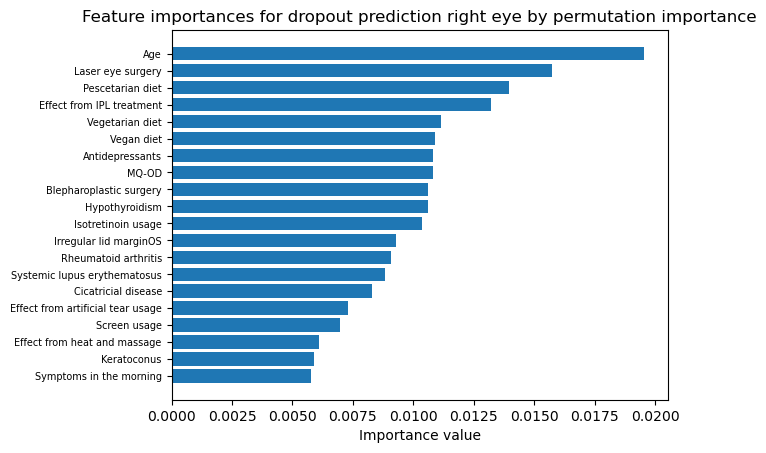

In [133]:
plt.title('Feature importances for dropout prediction right eye by permutation importance')
plt.xlabel('Importance value')
plt.yticks(size=7)
#plt.barh(feature_dfRightZ['Features'],feature_dfRightZ['Importance_values'], height=0.8)
plt.barh(rightFeaturesZ,feature_dfRightZ['Importance_values'], height=0.8)
#plt.savefig('c:/users/fre_f/CBMSfigs/MLPpermOD.jpeg',bbox_inches='tight')
plt.show()


In [134]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=50, random_state=42).fit(X_trainScaled, y_train)
clf.predict(X_testScaled)

metrics()
#complete_output()

Balanced accuracy: 0.4481571815718157
MCC: 0.14974045689608148
F1: 0.4040920983778127
Confusion matrix: 
[[ 3  3  0  0]
 [ 3 21 16 10]
 [ 3 14 13 11]
 [ 0  3  5 10]]
Classification report: 
              precision    recall  f1-score   support

   class 0/1       0.33      0.50      0.40         6
     class 2       0.51      0.42      0.46        50
     class 3       0.38      0.32      0.35        41
     class 4       0.32      0.56      0.41        18

    accuracy                           0.41       115
   macro avg       0.39      0.45      0.40       115
weighted avg       0.43      0.41      0.41       115



In [135]:
#Feature importances:
feature_dfRight = pd.DataFrame(clf.feature_names_in_,columns=['Features'])
feature_dfRight['Importance_values'] = clf.feature_importances_.tolist()
#Sort by importance
feature_dfRight = feature_dfRight.sort_values(by = 'Importance_values',ascending=True)
#Remove features with importance =0
feature_dfRight=feature_dfRight[feature_dfRight['Importance_values']!=0]

In [136]:
#Pick the top 15 features
feature_dfRight=feature_dfRight.iloc[-15:,:]

In [137]:
feature_dfRight

,Features,Importance_values
47,OSDI-0,0.02
15,telangiectasierOD-0,0.02
56,Stikkende fornemmelse OS-0,0.02
80,Kunstig tårevæske-0,0.04
44,Cicatricial,0.04
52,Brennende følelse OS-0,0.04
50,Sandfølelse OS-0,0.04
45,IOPOD-0,0.04
30,OsmOS-0,0.04
39,KjertlerOS-0,0.04


In [138]:
#Create interpretable feature names: 
rightFeatures = ['OSDI', ' TelangiectasiasOD', 'Stinging sensationOS', 'Artificial tear usage', 'Cicatricial disease', 'Burning sensationOS',
                'Gritty sensationOS', 'IOP-OD', 'OsmolarityOS', 'Expressible glandsOS', 'Expressible glandsOD', 'ItchingOS', 'OsmolarityOD',
                'TBUT-OD', 'Age']

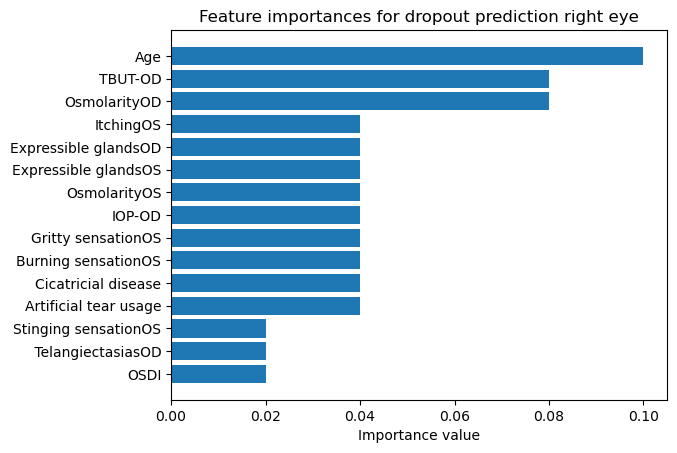

In [139]:
plt.title('Feature importances for dropout prediction right eye')
plt.xlabel('Importance value')
#plt.yticks(size=7)
plt.barh(rightFeatures,feature_dfRight['Importance_values'], height=0.8)
#plt.savefig('c:/users/fre_f/CBMSfigs/AdaFIOD.jpeg',bbox_inches='tight')
plt.show()

In [140]:
result = permutation_importance(clf,X_trainScaled, y_train,n_repeats=20, random_state = 42)

In [141]:
feature_dfRightX = pd.DataFrame(clf.feature_names_in_,columns=['Features'])
feature_dfRightX['Importance_values'] = result.importances_mean.tolist()
#Sort by importance
feature_dfRightX = feature_dfRightX.sort_values(by = 'Importance_values',ascending=True)
#Remove features with importance =0
feature_dfRightX=feature_dfRightX[feature_dfRightX['Importance_values']!=0]

In [142]:
#Pick the top X features
feature_dfRightX=feature_dfRightX.iloc[-20:,:]

In [143]:
feature_dfRightX

,Features,Importance_values
21,HyperemiOD-0,0.009279
64,Kløe OS-0,0.009607
33,FBUTOD-0,0.010699
44,Cicatricial,0.011681
72,Sommer-0,0.012664
45,IOPOD-0,0.013428
56,Stikkende fornemmelse OS-0,0.015393
68,Formiddag-0,0.016485
36,OSSOD-0,0.016594
59,Tåreflod OD-0,0.017140


In [144]:
rightFeaturesX = ['HyperemiaOD', 'ItchingOS', 'TBUT-OD', 'Cicatricial disease', 'Symptoms in summer', 'IOP-OD', 'Stinging sensationOS', 'Symptoms in the morning',
                 'OSS-OD', 'EpiphoraOD', 'Expressible glandsOD', 'Omega-3 supplements', 'TelangiectasiasOD', 'OsmolarityOS', 'Artificial tear usage', 'TBUT-OS', 
                 'EpiphoraOS', 'OsmolarityOD', 'Expressible glandsOS', 'Age']

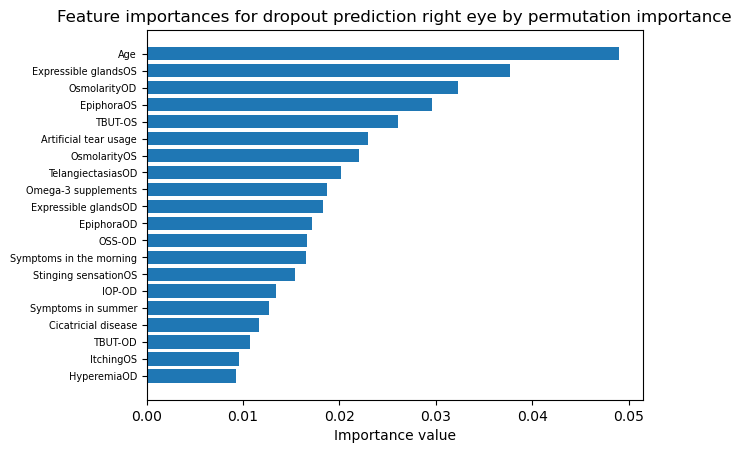

In [145]:
plt.title('Feature importances for dropout prediction right eye by permutation importance')
plt.xlabel('Importance value')
plt.yticks(size=7)
#plt.barh(feature_dfRightX['Features'],feature_dfRightX['Importance_values'], height=0.8)
plt.barh(rightFeaturesX,feature_dfRightX['Importance_values'], height=0.8)
#plt.savefig('c:/users/fre_f/CBMSfigs/AdapermOD.jpeg',bbox_inches='tight')
plt.show()

In [146]:
from sklearn.ensemble import HistGradientBoostingClassifier
clf = HistGradientBoostingClassifier().fit(X_trainScaled, y_train)
clf.predict(X_testScaled)

metrics()
#complete_output()

Balanced accuracy: 0.4881571815718157
MCC: 0.17721070245927809
F1: 0.4662246204499726
Confusion matrix: 
[[ 4  2  0  0]
 [ 3 29 13  5]
 [ 1 22 13  5]
 [ 0  7  4  7]]
Classification report: 
              precision    recall  f1-score   support

   class 0/1       0.50      0.67      0.57         6
     class 2       0.48      0.58      0.53        50
     class 3       0.43      0.32      0.37        41
     class 4       0.41      0.39      0.40        18

    accuracy                           0.46       115
   macro avg       0.46      0.49      0.47       115
weighted avg       0.46      0.46      0.45       115



In [147]:
result = permutation_importance(clf,X_trainScaled, y_train,n_repeats=20, random_state = 42)

In [148]:
feature_dfRightY = pd.DataFrame(clf.feature_names_in_,columns=['Features'])
feature_dfRightY['Importance_values'] = result.importances_mean.tolist()
#Sort by importance
feature_dfRightY = feature_dfRightY.sort_values(by = 'Importance_values',ascending=True)
#Remove features with importance =0
feature_dfRightY=feature_dfRightY[feature_dfRightY['Importance_values']!=0]

In [149]:
#Pick the top X features
#feature_dfRightY=feature_dfRightY.iloc[-20:,:]

In [150]:
feature_dfRightY

,Features,Importance_values
62,Rødt øye OS-0,0.000218
33,FBUTOD-0,0.000328
29,OsmOD-0,0.001092
1,Alder,0.010153


In [151]:
rightFeaturesY = ['RednessOS', 'TBUT-OD', 'OsmolarityOD', 'Age']

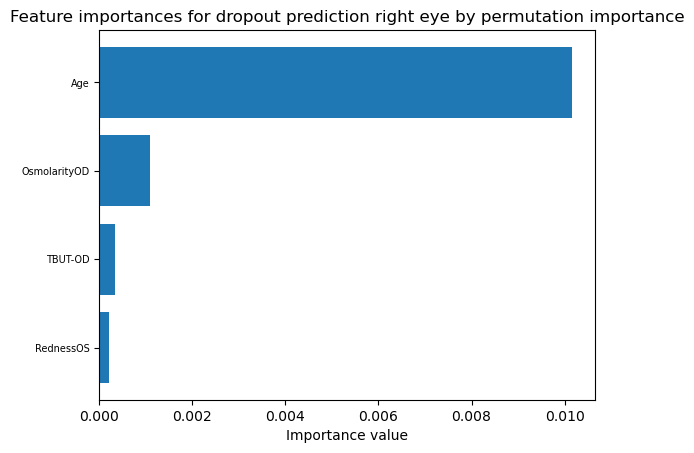

In [152]:
plt.title('Feature importances for dropout prediction right eye by permutation importance')
plt.xlabel('Importance value')
plt.yticks(size=7)
plt.barh(rightFeaturesY,feature_dfRightY['Importance_values'], height=0.8)
#plt.barh(feature_dfRightY['Features'],feature_dfRightY['Importance_values'], height=0.8)
#plt.savefig('c:/users/fre_f/CBMSfigs/HGBCpermOD.jpeg',bbox_inches='tight')
plt.show()

In [153]:
from xgboost import XGBClassifier
clf = XGBClassifier(max_depth=10, eta=0.3, reg_lambda=50, alpha=0).fit(X_trainScaled, y_train)
clf.predict(X_testScaled)

metrics()

Balanced accuracy: 0.43481029810298105
MCC: 0.19877279850012866
F1: 0.43710944483848846
Confusion matrix: 
[[ 2  3  1  0]
 [ 2 31 14  3]
 [ 1 18 14  8]
 [ 0  7  3  8]]
Classification report: 
              precision    recall  f1-score   support

   class 0/1       0.40      0.33      0.36         6
     class 2       0.53      0.62      0.57        50
     class 3       0.44      0.34      0.38        41
     class 4       0.42      0.44      0.43        18

    accuracy                           0.48       115
   macro avg       0.45      0.43      0.44       115
weighted avg       0.47      0.48      0.47       115



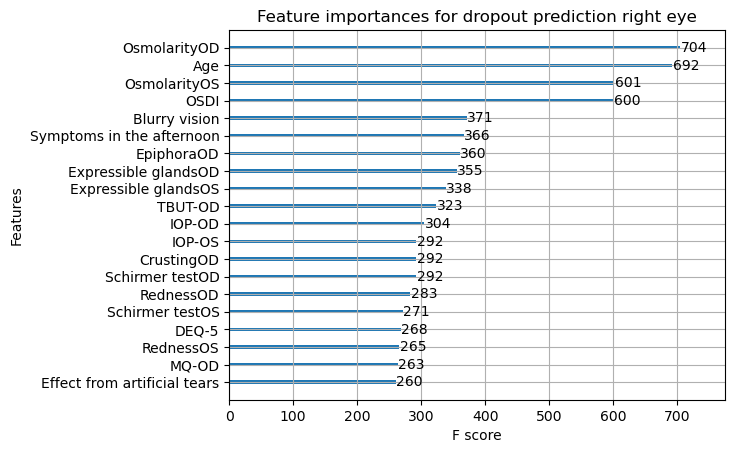

In [154]:
from xgboost import plot_importance
fig, ax = plt.subplots()
plot_importance(clf, max_num_features = 20, ax=ax)
plt.title('Feature importances for dropout prediction right eye')
ax.set_yticklabels(('Effect from artificial tears', 'MQ-OD', 'RednessOS', 'DEQ-5', 'Schirmer testOS', 
                    'RednessOD', 'Schirmer testOD', 'CrustingOD', 'IOP-OS', 'IOP-OD', 'TBUT-OD', 
                    'Expressible glandsOS', 'Expressible glandsOD', 'EpiphoraOD', 
                    'Symptoms in the afternoon', 'Blurry vision', 'OSDI', 'OsmolarityOS', 
                    'Age', 'OsmolarityOD'))
plt.savefig('c:/users/fre_f/CBMSfigs/XGBOD.jpeg',bbox_inches='tight')
plt.show()

In [155]:
import lightgbm as lgb
from lightgbm import LGBMClassifier
clf = LGBMClassifier().fit(X_trainScaled, y_train)
clf.predict(X_testScaled)

metrics()

Balanced accuracy: 0.49925474254742547
MCC: 0.19641485813097306
F1: 0.49918678739101274
Confusion matrix: 
[[ 4  2  0  0]
 [ 2 30 13  5]
 [ 0 22 14  5]
 [ 0  8  3  7]]
Classification report: 
              precision    recall  f1-score   support

   class 0/1       0.67      0.67      0.67         6
     class 2       0.48      0.60      0.54        50
     class 3       0.47      0.34      0.39        41
     class 4       0.41      0.39      0.40        18

    accuracy                           0.48       115
   macro avg       0.51      0.50      0.50       115
weighted avg       0.48      0.48      0.47       115



In [156]:
multiclassDf = pd.DataFrame(clf.feature_name_, columns =['Features'])
multiclassDf['Importance_values']= clf.feature_importances_.tolist()
#Sort by importance
multiclassDf = multiclassDf.sort_values(by='Importance_values',ascending=True)
#Remove 0 values
multiclassDf = multiclassDf[multiclassDf['Importance_values']!=0]

multiclassDf=multiclassDf.iloc[-20:,:]

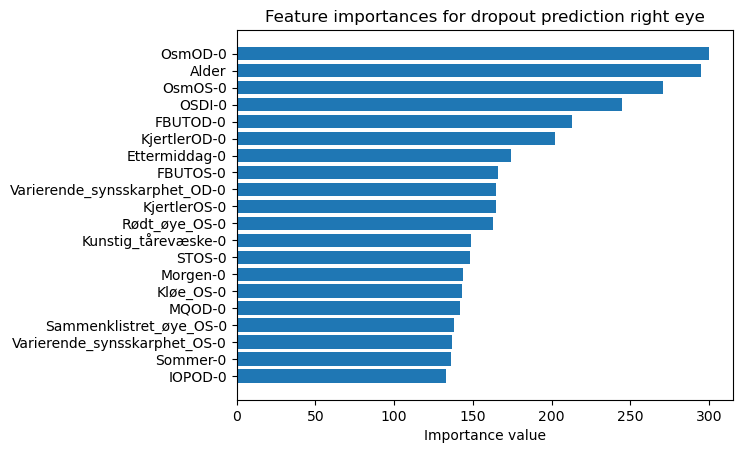

In [157]:
plt.title('Feature importances for dropout prediction right eye')
plt.xlabel('Importance value')
#plt.yticks(size=7)
plt.barh(multiclassDf['Features'],multiclassDf['Importance_values'], height=0.8)
plt.show()

In [158]:
FeatureList = ['IOP-OD', 'Symptoms in the summer', 'Blurry visionOS', 'CrustingOS', 'MQ-OD', 
              'ItchingOS', 'Symptoms in the morning', 'Schirmer testOS', 'Effect from artificial tears',
              'RednessOS', 'Expressible glandsOS', 'Blurry visionOD', 'TBUT-OS', 
               'Symptoms in the afternoon', 'Expressible glandsOD', 'TBUT-OD', 'OSDI', 'OsmolarityOS',
              'Age', 'OsmolarityOD']


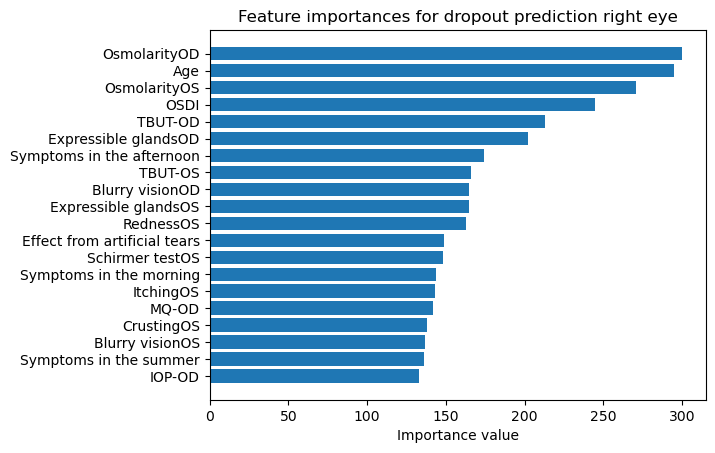

In [159]:
plt.title('Feature importances for dropout prediction right eye')
plt.xlabel('Importance value')
plt.barh(FeatureList,multiclassDf['Importance_values'], height=0.8)
plt.savefig('c:/users/fre_f/CBMSfigs/LGBMOD.jpeg',bbox_inches='tight')
plt.show()

# Training and predicting on the left eye

In [160]:
#df2.iloc[: ,1]

In [161]:
X_OS = df2.iloc[:,2:]


In [162]:
#df2.iloc[:,1]

In [163]:
y_OS = df2.iloc[:,1]

In [164]:
X_trainOS, X_testOS, y_trainOS, y_testOS = train_test_split(X_OS, y_OS, test_size = 0.2, random_state=42)


In [165]:
scaler = StandardScaler()
X_trainScaledOS = scaler.fit_transform(X_trainOS)
X_testScaledOS = scaler.transform(X_testOS)
X_trainScaledOS = pd.DataFrame(X_trainScaledOS, columns = X_trainOS.columns.tolist(), index=X_trainOS.index)
X_testScaledOS = pd.DataFrame(X_testScaledOS, columns = X_testOS.columns.tolist(), index=X_testOS.index)

In [166]:
type(X_trainScaledOS)
type(X_testScaledOS)

pandas.core.frame.DataFrame

In [167]:
print(X_trainScaledOS.shape)
print(X_testScaledOS.shape)
print(y_trainOS.shape)
print(y_testOS.shape)

(458, 90)
(115, 90)
(458,)
(115,)


In [168]:
#X_trainScaledOS

In [169]:
def metricsOS():
    y_predOS = clf.predict(X_testScaledOS)
    bal_acc = balanced_accuracy_score(y_testOS, y_predOS)
    mcc = matthews_corrcoef(y_testOS, y_predOS)
    f1 = f1_score(y_testOS, y_predOS, average="macro")
    cf = confusion_matrix(y_testOS, y_predOS)
    target_names = ['class 0/1', 'class 2', 'class 3', 'class 4']
    print(f"Balanced accuracy: {bal_acc}")
    print(f"MCC: {mcc}")
    print(f"F1: {f1}")
    print(f"Confusion matrix: \n{cf}")
    print(f"Classification report: \n{classification_report(y_testOS, y_predOS, target_names=target_names)}")

In [170]:
# lbfgs, sgd, adam
#logistic, tanh, relu
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver="adam", activation="relu", learning_rate="constant", random_state=42, max_iter=3000, verbose=False).fit(X_trainScaledOS, y_trainOS)
clf.out_activation_="softmax"
clf.predict(X_testScaledOS)

metricsOS()

Balanced accuracy: 0.34222293933247283
MCC: 0.09997843505790185
F1: 0.34066016771168645
Confusion matrix: 
[[ 2  4  2  0]
 [ 4 25  8  7]
 [ 1 17  7  9]
 [ 0 11  8 10]]
Classification report: 
              precision    recall  f1-score   support

   class 0/1       0.29      0.25      0.27         8
     class 2       0.44      0.57      0.50        44
     class 3       0.28      0.21      0.24        34
     class 4       0.38      0.34      0.36        29

    accuracy                           0.38       115
   macro avg       0.35      0.34      0.34       115
weighted avg       0.37      0.38      0.37       115



In [171]:
from sklearn.inspection import permutation_importance

result = permutation_importance(clf,X_trainScaledOS, y_trainOS,n_repeats=20, random_state = 42)

In [172]:
feature_dfLeftA = pd.DataFrame(clf.feature_names_in_,columns=['Features'])
feature_dfLeftA['Importance_values'] = result.importances_mean.tolist()
#Sort by importance
feature_dfLeftA = feature_dfLeftA.sort_values(by = 'Importance_values',ascending=True)
#Remove features with importance =0
feature_dfLeftA=feature_dfLeftA[feature_dfLeftA['Importance_values']!=0]

In [173]:
#Pick the top X features
feature_dfLeftA=feature_dfLeftA.iloc[-20:,:]

In [174]:
feature_dfLeftA

,Features,Importance_values
35,BreakupPattern-0,0.003275
9,SS,0.003493
82,Betennelsesdempende-0,0.003603
33,FBUTOD-0,0.003712
34,FBUTOS-0,0.004258
77,Vegansk,0.004258
79,Pesketariansk,0.004803
11,SLE,0.005568
37,OSSOS-0,0.007205
83,Tåreplugger-0,0.007314


In [175]:
leftFeaturesA = ['Tear flm break up pattern', 'Sjögren`s syndrome', 'Effect from antiinflammatories', 'TBUT-OD', 'TBUT-OS', 'Vegan diet', 'Pesceterian diet',
                'Systemic lupus erythematosus', 'OSS-OS', 'Effect from tear plugs', 'Rheumatoid arthritis', 'Isotretionin usage', 'Keratoconus', 'Blepharoplastic surgery',
                'Glaucoma', 'Hypothyroidism', 'Cicatricial disease', 'Rosacea', 'Symptoms during autumn', 'Effect from IPL treatment']

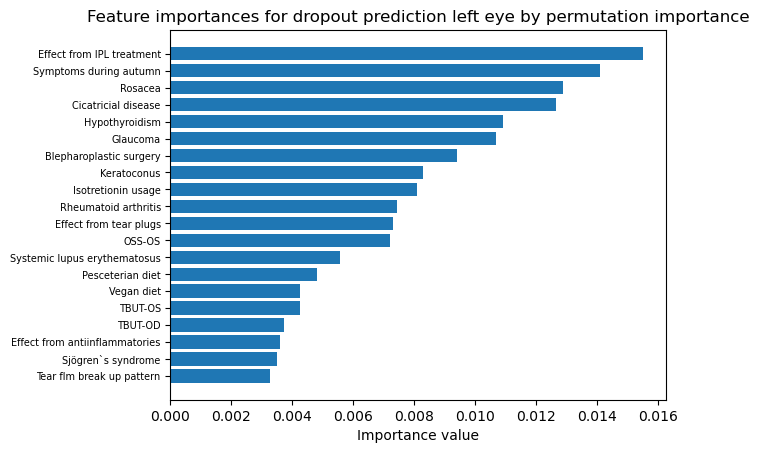

In [176]:
plt.title('Feature importances for dropout prediction left eye by permutation importance')
plt.xlabel('Importance value')
plt.yticks(size=7)
#plt.barh(feature_dfLeftA['Features'],feature_dfLeftA['Importance_values'], height=0.8)
plt.barh(leftFeaturesA,feature_dfLeftA['Importance_values'], height=0.8)
#plt.savefig('c:/users/fre_f/CBMSfigs/MLPpermOS.jpeg',bbox_inches='tight')
plt.show()

In [177]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=50, random_state=42).fit(X_trainScaledOS, y_trainOS)
clf.predict(X_testScaledOS)

metricsOS()

Balanced accuracy: 0.3415833026000369
MCC: 0.12533301728615154
F1: 0.3466412543153049
Confusion matrix: 
[[ 1  4  2  1]
 [ 1 17 17  9]
 [ 1  9 15  9]
 [ 0  6 11 12]]
Classification report: 
              precision    recall  f1-score   support

   class 0/1       0.33      0.12      0.18         8
     class 2       0.47      0.39      0.42        44
     class 3       0.33      0.44      0.38        34
     class 4       0.39      0.41      0.40        29

    accuracy                           0.39       115
   macro avg       0.38      0.34      0.35       115
weighted avg       0.40      0.39      0.39       115



In [178]:
#Feature importances:
feature_dfLeft = pd.DataFrame(clf.feature_names_in_,columns=['Features'])
feature_dfLeft['Importance_values'] = clf.feature_importances_.tolist()
#Sort by importance
feature_dfLeft = feature_dfLeft.sort_values(by = 'Importance_values',ascending=True)
#Remove features with importance =0
feature_dfLeft=feature_dfLeft[feature_dfLeft['Importance_values']!=0]

In [179]:
#Pick the top 15 features
feature_dfLeft=feature_dfLeft.iloc[-15:,:]

In [180]:
feature_dfLeft

,Features,Importance_values
56,Stikkende fornemmelse OS-0,0.02
36,OSSOD-0,0.04
33,FBUTOD-0,0.04
39,KjertlerOS-0,0.04
80,Kunstig tårevæske-0,0.04
64,Kløe OS-0,0.04
58,Varierende synsskarphet OS-0,0.04
51,Brennende følelse OD-0,0.04
43,MQOS-0,0.04
47,OSDI-0,0.06


In [181]:
#Create interpretable feature names: 
leftFeatures = ['Stinging sensationOS', 'OSS-OD', 'TBUT-OD', 'Expressible glandsOS', 'Artificial tear usage',
                'ItchingOS', 'Blurry VisionOS', 'Burning SensationOD', 'MQ-OS', 'OSDI', 'CrustingOD', 'TBUT-OS',
                'PhotophobiaOS', 'Age', 'Symptoms in spring']

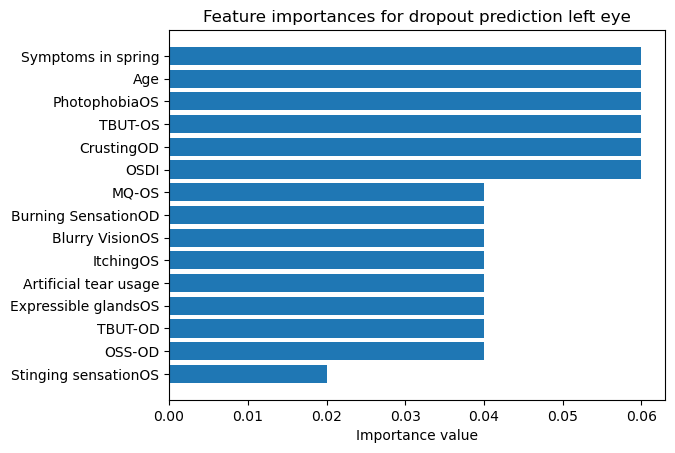

In [182]:
plt.title('Feature importances for dropout prediction left eye')
plt.xlabel('Importance value')
#plt.yticks(size=7)
plt.barh(leftFeatures,feature_dfLeft['Importance_values'], height=0.8)
#plt.savefig('c:/users/fre_f/CBMSfigs/AdaFIOS.jpeg',bbox_inches='tight')
plt.show()

In [183]:
result = permutation_importance(clf,X_trainScaledOS, y_trainOS,n_repeats=20, random_state = 42)

In [184]:
feature_dfLeftB = pd.DataFrame(clf.feature_names_in_,columns=['Features'])
feature_dfLeftB['Importance_values'] = result.importances_mean.tolist()
#Sort by importance
feature_dfLeftB = feature_dfLeftB.sort_values(by = 'Importance_values',ascending=True)
#Remove features with importance =0
feature_dfLeftB=feature_dfLeftB[feature_dfLeftB['Importance_values']!=0]

In [185]:
#Pick the top X features
feature_dfLeftB=feature_dfLeftB.iloc[-20:,:]

In [186]:
feature_dfLeftB

,Features,Importance_values
54,Lysømfintlighet OS-0,0.003493
43,MQOS-0,0.003821
60,Tåreflod OS-0,0.004585
34,FBUTOS-0,0.005895
64,Kløe OS-0,0.006550
33,FBUTOD-0,0.006659
16,telangiectasierOS-0,0.006878
47,OSDI-0,0.006987
67,Morgen-0,0.008624
19,PropperOD-0,0.010699


In [187]:
leftFeaturesB = ['Photophobia', 'MQ-OS', 'EpiphoraOS', 'TBUT-OS', 'ItchingOS', 'TBUT-OD', 'TelangiectasiasOS', 'OSDI', 'Symptoms in the morning',
                'Plugged glandular orificesOD', 'Stinging sensationOS', 'Gritty sensationOS', 'Effect from artificial tears', 'OSS-OD', 'Schirmer testOD',
                'HyperemiaOD', 'Expressible glandsOS', 'Displaced mucocutaneous junctionOS', 'Age', 'Symptoms in spring']

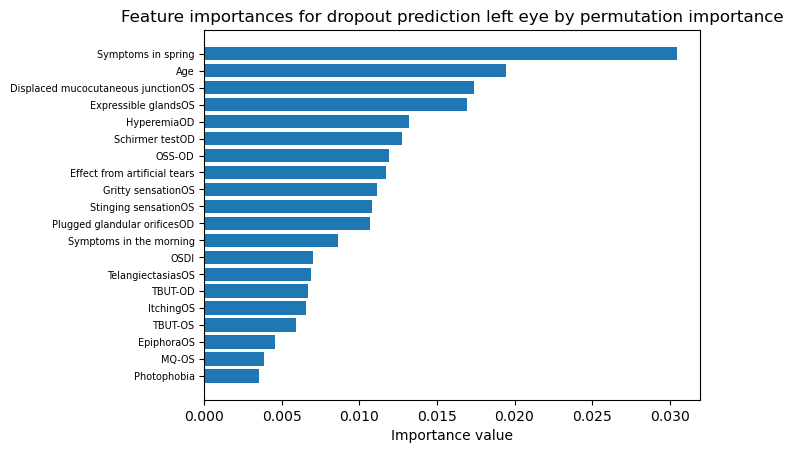

In [188]:
plt.title('Feature importances for dropout prediction left eye by permutation importance')
plt.xlabel('Importance value')
plt.yticks(size=7)
#plt.barh(feature_dfLeftB['Features'],feature_dfLeftB['Importance_values'], height=0.8)
plt.barh(leftFeaturesB,feature_dfLeftB['Importance_values'], height=0.8)
#plt.savefig('c:/users/fre_f/CBMSfigs/AdapermOS.jpeg',bbox_inches='tight')
plt.show()

In [189]:
from sklearn.ensemble import HistGradientBoostingClassifier
clf = HistGradientBoostingClassifier().fit(X_trainScaledOS, y_trainOS)
clf.predict(X_testScaledOS)

metricsOS()

Balanced accuracy: 0.34449336160796606
MCC: 0.09060010677818675
F1: 0.36589634401306015
Confusion matrix: 
[[ 2  5  1  0]
 [ 1 20 13 10]
 [ 0 13 10 11]
 [ 0  7 11 11]]
Classification report: 
              precision    recall  f1-score   support

   class 0/1       0.67      0.25      0.36         8
     class 2       0.44      0.45      0.45        44
     class 3       0.29      0.29      0.29        34
     class 4       0.34      0.38      0.36        29

    accuracy                           0.37       115
   macro avg       0.44      0.34      0.37       115
weighted avg       0.39      0.37      0.37       115



In [190]:
result = permutation_importance(clf,X_trainScaledOS, y_trainOS,n_repeats=20, random_state = 42)

In [191]:
feature_dfLeftC = pd.DataFrame(clf.feature_names_in_,columns=['Features'])
feature_dfLeftC['Importance_values'] = result.importances_mean.tolist()
#Sort by importance
feature_dfLeftC = feature_dfLeftC.sort_values(by = 'Importance_values',ascending=True)
#Remove features with importance =0
feature_dfLeftC=feature_dfLeftC[feature_dfLeftC['Importance_values']!=0]

In [192]:
#Pick the top X features
feature_dfLeftC=feature_dfLeftC.iloc[-20:,:]

In [193]:
feature_dfLeftC

,Features,Importance_values
39,KjertlerOS-0,0.000328


In [194]:
#rightFeaturesZ = ['Symptoms in the morning', 'Keratoconus', 'Effect from heat and massage', 'Screen usage', 'Effect from artificial tear usage', 'Cicatricial disease',
 #                'Systemic lupus erythematosus', 'Rheumatoid arthritis', 'Irregular lid marginOS', 'Isotretinoin usage', 'Hypothyroidism', 'Blepharoplastic surgery', 'MQ-OD',
  #               'Antidepressants', 'Vegan diet', 'Vegetarian diet', 'Effect from IPL treatment', 'Pescetarian diet', 'Laser eye surgery', 'Age']

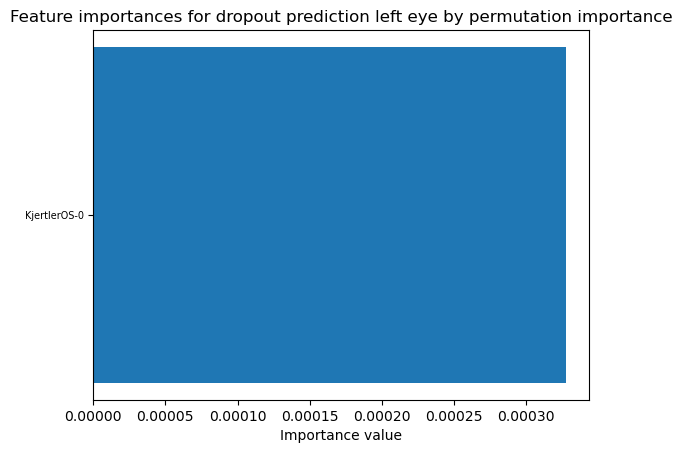

In [195]:
plt.title('Feature importances for dropout prediction left eye by permutation importance')
plt.xlabel('Importance value')
plt.yticks(size=7)
plt.barh(feature_dfLeftC['Features'],feature_dfLeftC['Importance_values'], height=0.8)
#plt.barh(leftFeaturesC,feature_dfLeftC['Importance_values'], height=0.8)
#plt.savefig('c:/users/fre_f/CBMSfigs/HGBCpermOS.jpeg',bbox_inches='tight')
plt.show()

In [196]:
from xgboost import XGBClassifier
clf = XGBClassifier(max_depth=10, eta=0.3, reg_lambda=50, alpha=0).fit(X_trainScaledOS, y_trainOS)
clf.predict(X_testScaledOS)

metrics()

Balanced accuracy: 0.3532520325203252
MCC: 0.11565661987967725
F1: 0.3376182474483445
Confusion matrix: 
[[ 1  4  1  0]
 [ 0 30 11  9]
 [ 1 16  6 18]
 [ 0  3  6  9]]
Classification report: 
              precision    recall  f1-score   support

   class 0/1       0.50      0.17      0.25         6
     class 2       0.57      0.60      0.58        50
     class 3       0.25      0.15      0.18        41
     class 4       0.25      0.50      0.33        18

    accuracy                           0.40       115
   macro avg       0.39      0.35      0.34       115
weighted avg       0.40      0.40      0.38       115



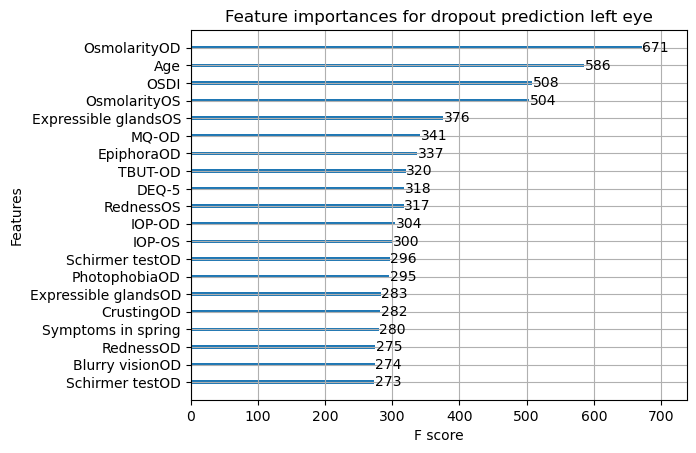

In [197]:
from xgboost import plot_importance
fig, ax = plt.subplots()
plot_importance(clf, max_num_features = 20, ax=ax)
plt.title('Feature importances for dropout prediction left eye')
ax.set_yticklabels(('Schirmer testOD', 'Blurry visionOD', 'RednessOD', 'Symptoms in spring', 'CrustingOD', 'Expressible glandsOD', 'PhotophobiaOD', 
                   'Schirmer testOD', 'IOP-OS', 'IOP-OD', 'RednessOS', 'DEQ-5', 'TBUT-OD', 'EpiphoraOD', 'MQ-OD', 'Expressible glandsOS', 'OsmolarityOS',
                   'OSDI', 'Age', 'OsmolarityOD'))
#plt.savefig('c:/users/fre_f/CBMSfigs/XGBOS.jpeg',bbox_inches='tight')
plt.show()

In [198]:
import lightgbm as lgb
from lightgbm import LGBMClassifier
clf = LGBMClassifier().fit(X_trainScaledOS, y_trainOS)
clf.predict(X_testScaledOS)

metrics()

Balanced accuracy: 0.3665311653116531
MCC: 0.09228074498741011
F1: 0.3666010065998231
Confusion matrix: 
[[ 2  3  1  0]
 [ 2 25 11 12]
 [ 0 17 10 14]
 [ 0  3  8  7]]
Classification report: 
              precision    recall  f1-score   support

   class 0/1       0.50      0.33      0.40         6
     class 2       0.52      0.50      0.51        50
     class 3       0.33      0.24      0.28        41
     class 4       0.21      0.39      0.27        18

    accuracy                           0.38       115
   macro avg       0.39      0.37      0.37       115
weighted avg       0.40      0.38      0.39       115



In [199]:
multiclassDfOS = pd.DataFrame(clf.feature_name_, columns =['Features'])
multiclassDfOS['Importance_values']= clf.feature_importances_.tolist()
#Sort by importance
multiclassDfOS = multiclassDfOS.sort_values(by='Importance_values',ascending=True)
#Remove 0 values
multiclassDfOS = multiclassDfOS[multiclassDfOS['Importance_values']!=0]

multiclassDfOS=multiclassDfOS.iloc[-20:,:]

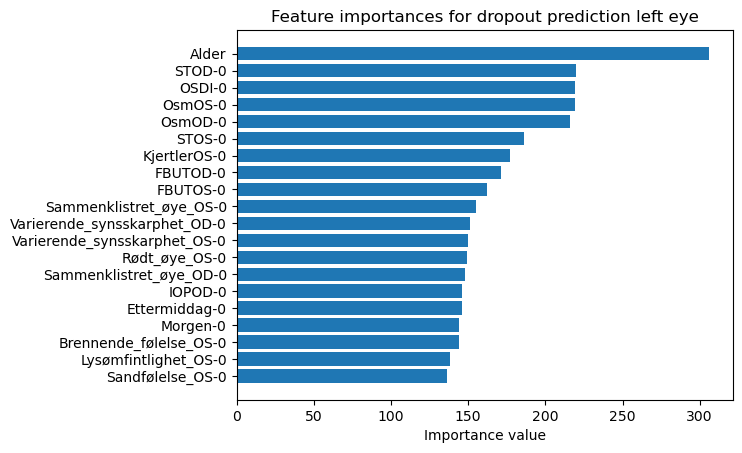

In [200]:
plt.title('Feature importances for dropout prediction left eye')
plt.xlabel('Importance value')
#plt.yticks(size=7)
plt.barh(multiclassDfOS['Features'],multiclassDfOS['Importance_values'], height=0.8)
plt.show()

In [201]:
FeatureListOS = ['Gritty sensationOS', 'PhotophobiaOS', 'Burning sensationOS', 'Symptoms in the morning', 
                'Symptoms in the afternoon', 'IOP-OD', 'CrustingOD', 'RednessOS', 'Blurry visionOS', 
                'Blurry visionOD', 'CrustingOS', 'TBUT-OS', 'TBUT-OD', 'Expressible glandsOS', 'Schirmer testOS',
                'OsmolarityOD', 'OsmolarityOS', 'OSDI', 'Schirmer testOD', 'Age']


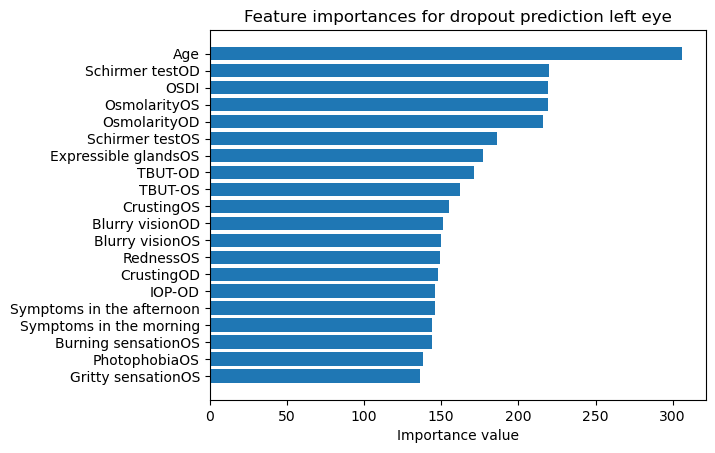

In [202]:
plt.title('Feature importances for dropout prediction left eye')
plt.xlabel('Importance value')
plt.barh(FeatureListOS,multiclassDfOS['Importance_values'], height=0.8)
#plt.savefig('c:/users/fre_f/CBMSfigs/LGBMOS.jpeg',bbox_inches='tight')
plt.show()